In [9]:
import re
import numpy as np
import scipy.spatial

In [7]:
file = open("sentences.txt", 'r')

In [8]:
sentences = file.read().split("\n")

In [9]:
sentences

['In comparison to dogs, cats have not undergone major changes during the domestication process.',
 'As cat simply catenates streams of bytes, it can be also used to concatenate binary files, where it will just concatenate sequence of bytes.',
 'A common interactive use of cat for a single file is to output the content of a file to standard output.',
 'Cats can hear sounds too faint or too high in frequency for human ears, such as those made by mice and other small animals.',
 'In one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.',
 'The domesticated cat and its closest wild ancestor are both diploid organisms that possess 38 chromosomes and roughly 20,000 genes.',
 'Domestic cats are similar in size to the other members of the genus Felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).',
 'However, if the output is piped or redirected, cat is unnecessary.',
 'cat with one named file is safer where human error i

In [24]:
lower = [re.split('[^a-z]', x.lower()) for x in sentences]

In [25]:
ready = []
for sent in lower:
    ready.append([x for x in sent if len(x)>0])

In [26]:
ready

[['in',
  'comparison',
  'to',
  'dogs',
  'cats',
  'have',
  'not',
  'undergone',
  'major',
  'changes',
  'during',
  'the',
  'domestication',
  'process'],
 ['as',
  'cat',
  'simply',
  'catenates',
  'streams',
  'of',
  'bytes',
  'it',
  'can',
  'be',
  'also',
  'used',
  'to',
  'concatenate',
  'binary',
  'files',
  'where',
  'it',
  'will',
  'just',
  'concatenate',
  'sequence',
  'of',
  'bytes'],
 ['a',
  'common',
  'interactive',
  'use',
  'of',
  'cat',
  'for',
  'a',
  'single',
  'file',
  'is',
  'to',
  'output',
  'the',
  'content',
  'of',
  'a',
  'file',
  'to',
  'standard',
  'output'],
 ['cats',
  'can',
  'hear',
  'sounds',
  'too',
  'faint',
  'or',
  'too',
  'high',
  'in',
  'frequency',
  'for',
  'human',
  'ears',
  'such',
  'as',
  'those',
  'made',
  'by',
  'mice',
  'and',
  'other',
  'small',
  'animals'],
 ['in',
  'one',
  'people',
  'deliberately',
  'tamed',
  'cats',
  'in',
  'a',
  'process',
  'of',
  'artificial',
  's

In [31]:
unique_set = set()
for sent in ready:
    for word in sent:
        unique_set.add(word)

In [32]:
len(unique_set)

254

In [47]:
unique_arr = list(unique_set)

In [37]:
del ready[-1]

In [39]:
matrix = np.zeros((len(ready), len(unique_set)))

In [42]:
matrix.shape

(22, 254)

In [44]:
def countWord(sent, xword):
    counter = 0
    for word in sent:
        if word == xword:
            counter += 1
    return counter

In [48]:
for i in range(len(matrix)):
    for j in range(len(matrix[i])):
        matrix[i][j] = countWord(ready[i], unique_arr[j])

In [49]:
matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [55]:
dists = []
for sent in matrix:
    dists.append(scipy.spatial.distance.cosine(matrix[0, :], sent))

In [56]:
dists

[0.0,
 0.9527544408738466,
 0.8644738145642124,
 0.8951715163278082,
 0.7770887149698589,
 0.9402385695332803,
 0.7327387580875756,
 0.9258750683338899,
 0.8842724875284311,
 0.9055088817476932,
 0.8328165362273942,
 0.8804771390665607,
 0.8396432548525454,
 0.8703592552895671,
 0.8740118423302576,
 0.9442721787424647,
 0.8406361854220809,
 0.956644501523794,
 0.9442721787424647,
 0.8885443574849294,
 0.8427572744917122,
 0.8250364469440588]

In [63]:
ready[6] #73

['domestic',
 'cats',
 'are',
 'similar',
 'in',
 'size',
 'to',
 'the',
 'other',
 'members',
 'of',
 'the',
 'genus',
 'felis',
 'typically',
 'weighing',
 'between',
 'and',
 'kg',
 'and',
 'lb']

In [64]:
ready[4]

['in',
 'one',
 'people',
 'deliberately',
 'tamed',
 'cats',
 'in',
 'a',
 'process',
 'of',
 'artificial',
 'selection',
 'as',
 'they',
 'were',
 'useful',
 'predators',
 'of',
 'vermin']

In [60]:
ready[2] #952

['a',
 'common',
 'interactive',
 'use',
 'of',
 'cat',
 'for',
 'a',
 'single',
 'file',
 'is',
 'to',
 'output',
 'the',
 'content',
 'of',
 'a',
 'file',
 'to',
 'standard',
 'output']

In [61]:
ready[5] #94 

['the',
 'domesticated',
 'cat',
 'and',
 'its',
 'closest',
 'wild',
 'ancestor',
 'are',
 'both',
 'diploid',
 'organisms',
 'that',
 'possess',
 'chromosomes',
 'and',
 'roughly',
 'genes']

In [62]:
ready[17] #956

['os',
 'x',
 'mountain',
 'lion',
 'was',
 'released',
 'on',
 'july',
 'for',
 'purchase',
 'and',
 'download',
 'through',
 'apple',
 's',
 'mac',
 'app',
 'store',
 'as',
 'part',
 'of',
 'a',
 'switch',
 'to',
 'releasing',
 'os',
 'x',
 'versions',
 'online',
 'and',
 'every',
 'year']

In [62]:
import math
def func(x):
    return math.sin(x / 5.0) * math.exp(x / 10.0) + 5 * math.exp(-x / 2.0)

x1 = 1
x2 = 15
y1 = func(x1)
y2 = func(x2)

In [63]:
a = np.array([[x1,1], [x2,1]])
b = np.array([y1,y2])

np.linalg.solve(a, b)

array([-0.18692825,  3.43914511])

In [64]:
y1, y2

(3.252216865271419, 0.6352214195786656)

In [65]:
import matplotlib.pyplot as plt

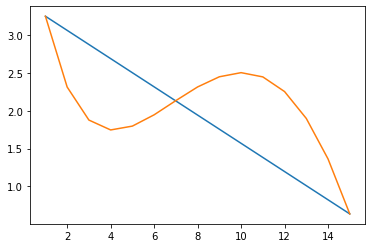

In [66]:
plt.plot([x1, x2], [y1, y2])
plt.plot([x for x in range(1,16,1)], [func(x) for x in range(1, 16, 1)])

In [67]:
x1 = 1.0
x2 = 8.0
x3 = 15.0

y1 = func(x1)
y2 = func(x2)
y3 = func(x3)

In [68]:
a = np.array([[x1, x1**2, 1], [x2, x2**2, 1], [x3, x3**2, 1]])
b = np.array([y1, y2, y3])

solve = np.linalg.solve(a, b)

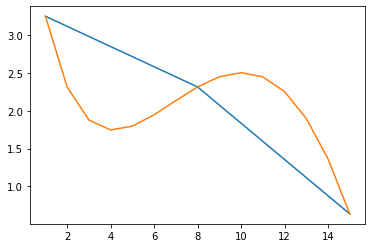

In [69]:
def approx(x):
    return solve[0]*x + solve[1]*(x**2) + solve[2]

plt.plot([x1, x2, x3], [approx(x1), approx(x2), approx(x3)])
plt.plot([x for x in range(1,16,1)], [func(x) for x in range(1, 16, 1)])

In [70]:
x1 = 1.0
x2 = 4.0
x3 = 10.0
x4 = 15.0

y1 = func(x1)
y2 = func(x2)
y3 = func(x3)
y4 = func(x4)

In [71]:
a = np.array([[1, x1, x1**2, x1**3], [1, x2, x2**2, x2**3], [1, x3, x3**2, x3**3], [1, x4, x4**2, x4**3]])
b = np.array([y1, y2, y3, y4])

solve3 = np.linalg.solve(a, b)

In [72]:
def approx3(x):
    return solve3[0] + solve3[1]*x + solve3[2]*(x**2) + solve3[3]*(x**3)

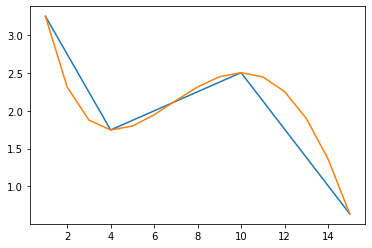

In [73]:
plt.plot([x1, x2, x3, x4], [approx3(x1), approx3(x2), approx3(x3), approx3(x4)])
plt.plot([x for x in range(1,16,1)], [func(x) for x in range(1, 16, 1)])

In [74]:
solve3

array([ 4.36264154, -1.29552587,  0.19333685, -0.00823565])